https://www.kaggle.com/skalskip/fifa-18-data-exploration-and-d3-js-visualization

part1-4 https://towardsdatascience.com/a-gentle-introduction-to-python-for-tableau-developers-part-3-8634fa5b9dec

if have time for prediction
https://instrovate.com/2019/06/20/forecasting-on-sample-super-store-data-set-using-python-pandas-arma/

In [ ]:
!wget http://www.tableau.com/sites/default/files/training/global_superstore.zip

--2020-10-03 15:11:39--  http://www.tableau.com/sites/default/files/training/global_superstore.zip
Resolving www.tableau.com (www.tableau.com)... 23.12.205.24
Connecting to www.tableau.com (www.tableau.com)|23.12.205.24|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.tableau.com/sites/default/files/training/global_superstore.zip [following]
--2020-10-03 15:11:40--  https://www.tableau.com/sites/default/files/training/global_superstore.zip
Connecting to www.tableau.com (www.tableau.com)|23.12.205.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5981912 (5.7M) [application/zip]
Saving to: ‘global_superstore.zip’

global_superstore.z 100%[===================>]   5.70M  --.-KB/s    in 0.04s   

2020-10-03 15:11:41 (145 MB/s) - ‘global_superstore.zip’ saved [5981912/5981912]



In [ ]:
!unzip global_superstore.zip

Archive:  global_superstore.zip
  inflating: Global Superstore.xls   


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
dataset = pd.read_excel("Global Superstore.xls")
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## monthly_sales method 1

In [ ]:
#monthly_sales = dataset.groupby(pd.Grouper(key='Order Date',freq='1M')).agg({'Sales':'sum'})
monthly_sales = dataset.groupby(pd.Grouper(key='Order Date',freq='1Y')).agg({'Sales':'sum'})
monthly_sales.head()

,Sales
Order Date,
2011-12-31,2.259451e+06
2012-12-31,2.677439e+06
2013-12-31,3.405746e+06
2014-12-31,4.299866e+06


In [ ]:
monthly_sales.reset_index(level=0, inplace=True)
monthly_sales.head()

,Order Date,Sales
0,2011-12-31,2.259451e+06
1,2012-12-31,2.677439e+06
2,2013-12-31,3.405746e+06
3,2014-12-31,4.299866e+06


(array([734138., 734319., 734503., 734685., 734869., 735050., 735234.,
        735415., 735599.]), <a list of 9 Text major ticklabel objects>)

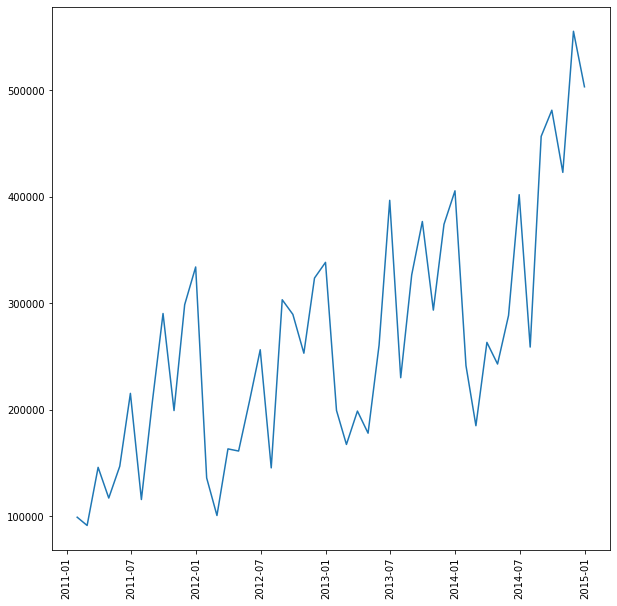

In [ ]:
plt.figure(figsize=(10,10))
monthly_sales = monthly_sales.sort_values('Order Date', ascending=True)
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.xticks(rotation='vertical')

## yearly_sales method 1

In [ ]:
monthly_sales = dataset.groupby(dataset['Order Date'].dt.strftime('%Y')).agg({'Sales':'sum'})
monthly_sales.head()

,Sales
Order Date,
2011,2.259451e+06
2012,2.677439e+06
2013,3.405746e+06
2014,4.299866e+06


In [ ]:
monthly_sales.reset_index(level=0, inplace=True)
monthly_sales.head()

,Order Date,Sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


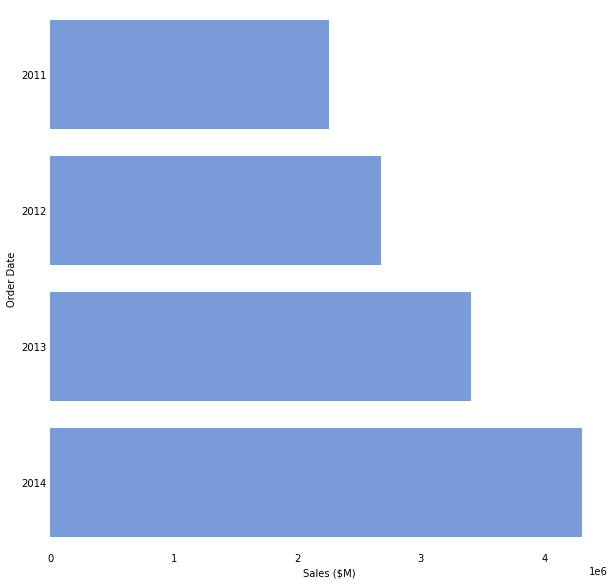

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
viz = sns.barplot(
    data=monthly_sales,
    x='Sales',
    y='Order Date',
    color='cornflowerblue',
    saturation=0.7
)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlabel("Sales ($M)")
sns.despine(left=True, bottom=True)

## country_sales

In [ ]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
country_sales = dataset.groupby(pd.Grouper(key='Country')).agg({'Sales':'sum'})
country_sales.reset_index(level=0, inplace=True)
country_sales.head()

,Country,Sales
0,United States,2.297201e+06
1,Australia,9.252359e+05
2,Germany,6.288400e+05
3,Senegal,2.884890e+04
4,New Zealand,1.720206e+05


In [ ]:
!pip install folium

In [ ]:
!wget https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json

--2020-10-03 08:31:51--  https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87688 (86K) [text/plain]
Saving to: ‘us-states.json’

us-states.json      100%[===================>]  85.63K  --.-KB/s    in 0.03s   

2020-10-03 08:31:52 (2.79 MB/s) - ‘us-states.json’ saved [87688/87688]



In [ ]:
#installation
!pip install pycountry-convert

     |████████████████████████████████| 10.1MB 5.2MB/s 
     |████████████████████████████████| 235kB 51.2MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=254f4d417615ddde284e6eac808b6f65b9501d6998bb609b1fa47dbb1a3c3e19
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [ ]:
get_continent(country_sales['Country'])

('Unknown', 'Unknown')

'Unknown'

In [ ]:
country_sales['code'] = 'Unknown'
country_sales['continent'] = 'Unknown'
country_sales['contry_short'] = 'Unknown'
for idx,row in country_sales.iterrows():
    
    codes = get_continent(row['Country'])
    contry_short = codes[0]
    continent_short = codes[1]
    country_sales['continent'].iloc[idx] = continent_short
    country_sales['code'].iloc[idx] = codes
    country_sales['contry_short'].iloc[idx] = contry_short
    

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
country_sales.head()

,Country,Sales,code,continent,contry_short
0,United States,2.297201e+06,"(US, NA)",NA,US
1,Australia,9.252359e+05,"(AU, OC)",OC,AU
2,Germany,6.288400e+05,"(DE, EU)",EU,DE
3,Senegal,2.884890e+04,"(SN, AF)",AF,SN
4,New Zealand,1.720206e+05,"(NZ, OC)",OC,NZ


In [ ]:
pip install geopy

In [ ]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



In [ ]:
country_sales['geolocate'] = 'Unknown'
country_sales['latitude'] = 'Unknown'
country_sales['longitude'] = 'Unknown'
for idx,row in country_sales.iterrows():
    
    geolocates = geolocate(row['Country'])
    latitude = geolocates[0]
    longitude = geolocates[1]
    country_sales['geolocate'].iloc[idx] = geolocates
    country_sales['latitude'].iloc[idx] = latitude
    country_sales['longitude'].iloc[idx] = longitude    

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
country_sales.head()

,Country,Sales,code,continent,contry_short,geolocate,latitude,longitude
0,United States,2.297201e+06,"(US, NA)",NA,US,"(39.7837304, -100.4458825)",39.7837,-100.446
1,Australia,9.252359e+05,"(AU, OC)",OC,AU,"(-24.7761086, 134.755)",-24.7761,134.755
2,Germany,6.288400e+05,"(DE, EU)",EU,DE,"(51.0834196, 10.4234469)",51.0834,10.4234
3,Senegal,2.884890e+04,"(SN, AF)",AF,SN,"(14.4750607, -14.4529612)",14.4751,-14.453
4,New Zealand,1.720206e+05,"(NZ, OC)",OC,NZ,"(-41.5000831, 172.8344077)",-41.5001,172.834


In [ ]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(country_sales)):
        lat = country_sales.iloc[i]['latitude']
        long = country_sales.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {}<br>
                     Sales($) : {}<br>"""
        popup_text = popup_text.format(country_sales.iloc[i]['Country'],
                                   country_sales.iloc[i]['Sales']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map


##monthly sales

In [ ]:
monthly_sales = dataset.groupby(pd.Grouper(key='Order Date',freq='1M')).agg({'Sales':'sum'})
monthly_sales.reset_index(level=0, inplace=True)
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.strftime('%Y-%m')

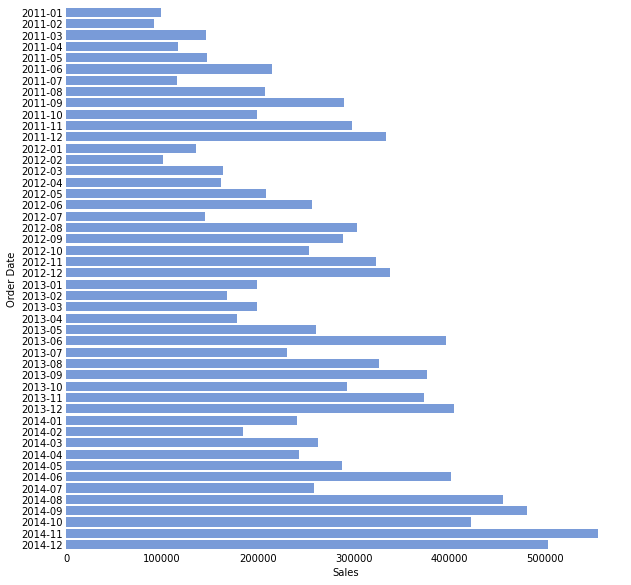

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
viz = sns.barplot(
    data=monthly_sales,
    x='Sales',
    y='Order Date',
    color='cornflowerblue',
    saturation=0.7
)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlabel("Sales")
sns.despine(left=True, bottom=True)

## per category sales

In [ ]:
subcat_sales_df = dataset\
.groupby(['Sub-Category'])\
.agg({'Sales': 'sum', 'Profit': 'sum'})\
.reset_index()\
.sort_values('Sales', ascending=False)

In [ ]:
subcat_sales_df.head()

,Sub-Category,Sales,Profit
13,Phones,1.706824e+06,216717.00580
6,Copiers,1.509436e+06,258567.54818
5,Chairs,1.501682e+06,140396.26750
4,Bookcases,1.466572e+06,161924.41950
14,Storage,1.127086e+06,108461.48980


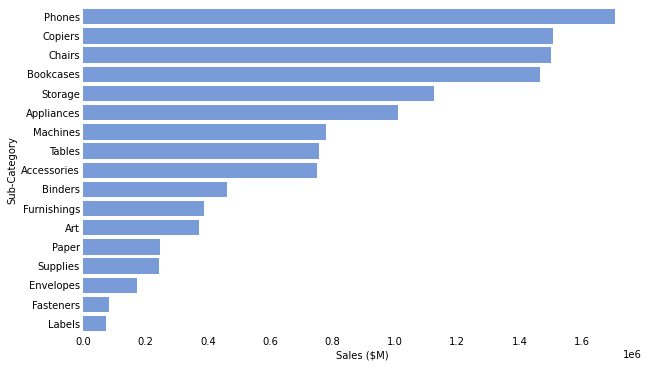

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 6))
viz = sns.barplot(
    data=subcat_sales_df,
    x='Sales',
    y='Sub-Category',
    color='cornflowerblue',
    saturation=0.7
)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlabel("Sales ($M)")
sns.despine(left=True, bottom=True)